# PowerBI House Prediction Projesi için Veri Setinin Detaylı Analizi

### Bu notebook, PowerBI için geliştirilen Ev Fiyat Tahmini projesine ait veri setinin detaylı analizini içermektedir. Proje, konut piyasasındaki fiyat dinamiklerini anlamak ve potansiyel alıcılar, satıcılar veya yatırımcılar için değerli içgörüler sağlamak amacıyla tasarlanmıştır.

## Veri Seti Hakkında

### Veri seti, konut fiyatları ile ilgili çeşitli özellikleri (konum, büyüklük, oda sayısı, yıl, inşa kalitesi vb.) içermektedir. Bu bilgiler, piyasadaki mevcut ve geçmiş konut satışlarını temsil eden geniş bir veri yelpazesinden derlenmiştir. Veri seti, hem temizlenmiş hem de bazı ön işlemlerden geçirilmiştir. Bunlar arasında eksik değerlerin giderilmesi, veri tiplerinin standardizasyonu ve bazı temel istatistiksel analizler bulunmaktadır.

### Bu analiz, veri setindeki temel eğilimleri, anormallikleri ve ilginç örüntüleri belirlemek için detaylı istatistiksel yöntemler ve görselleştirme teknikleri kullanmaktadır. Analizin sonucunda elde edilen bulgular, PowerBI raporlarına entegre edilerek kullanıcıların veriyi kolayca anlaması ve yorumlaması amaçlanmıştır.

In [1]:
import pandas as pd                 
import numpy as np                  
import matplotlib.pyplot as plt     
import seaborn as sns               
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  

%matplotlib inline
plt.style.use('ggplot') 
sns.set_theme(style="whitegrid")  


import warnings
warnings.filterwarnings('ignore') 

In [2]:

import pandas as pd


file_path = 'cleaned_house_prediction_data_for_powerbi.csv'
data = pd.read_csv(file_path)

data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,TA,Y,0,61,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,TA,Y,298,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,TA,Y,0,42,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,TA,Y,0,35,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,TA,Y,192,84,0,12,2008,WD,Normal,250000


In [3]:

data.isnull().sum()


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 73, dtype: int64

In [5]:

data.describe().T


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.500000,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.000000,70.00,190.0
LotFrontage,1460.0,70.049958,22.024023,21.0,60.00,70.049958,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.500000,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.000000,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.000000,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.000000,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.000000,2004.00,2010.0
MasVnrArea,1460.0,103.685262,180.569112,0.0,0.00,0.000000,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.500000,712.25,5644.0


In [6]:

data.nunique()


Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 73, dtype: int64

In [7]:

data.dtypes


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 73, dtype: object

In [8]:

data.shape


(1460, 73)

Text(0, 0.5, 'Sale Price')

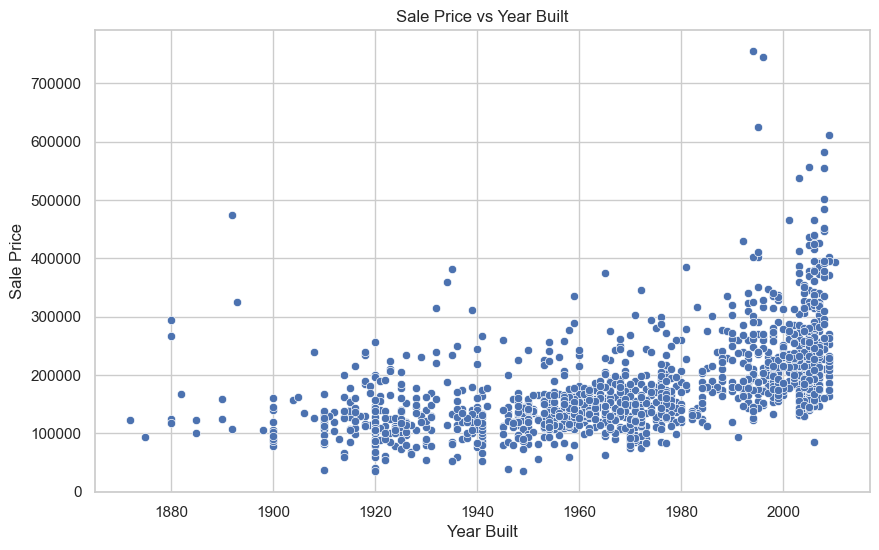

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=data)
plt.title('Sale Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')


Text(0, 0.5, 'Sale Price')

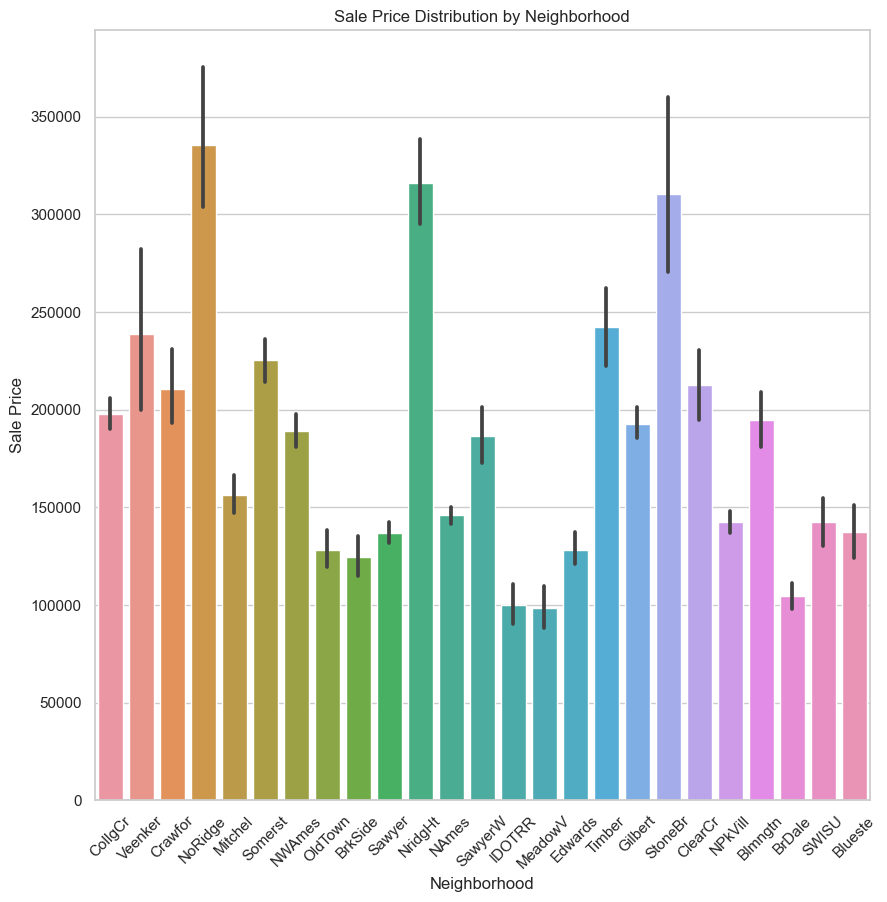

In [25]:
plt.figure(figsize=(10, 10))
sns.barplot(x='Neighborhood', y='SalePrice', data=data)
plt.xticks(rotation=45)
plt.title('Sale Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')


In [1]:
import plotly.express as px

fig = px.scatter(data, x='OverallQual', y='SalePrice', size='GarageArea', color='YearBuilt', hover_name='Neighborhood', title='Interactive Plot of Sale Price and Other Features')
fig.show()

NameError: name 'data' is not defined

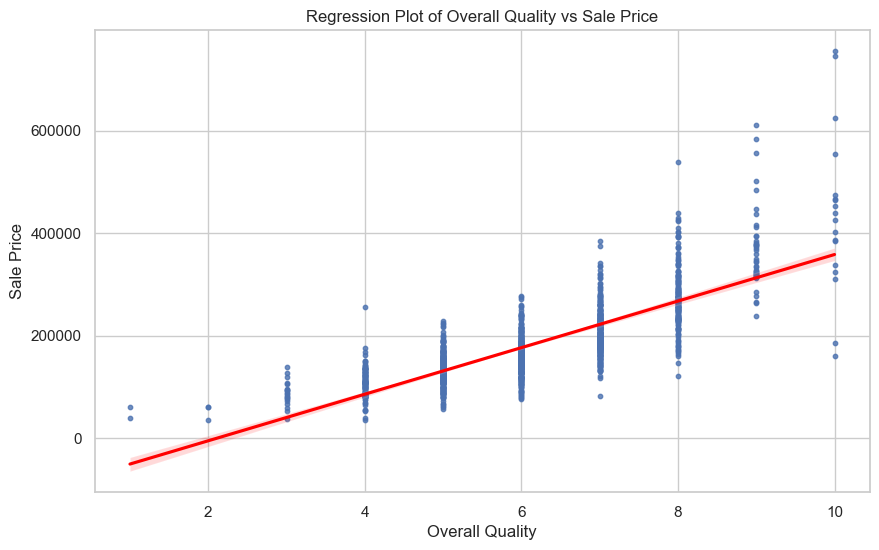

In [37]:

plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='OverallQual', y='SalePrice', scatter_kws={'s':10}, line_kws={"color": "red"})


plt.title('Regression Plot of Overall Quality vs Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')

plt.show()


Text(0, 0.5, 'Sale Price')

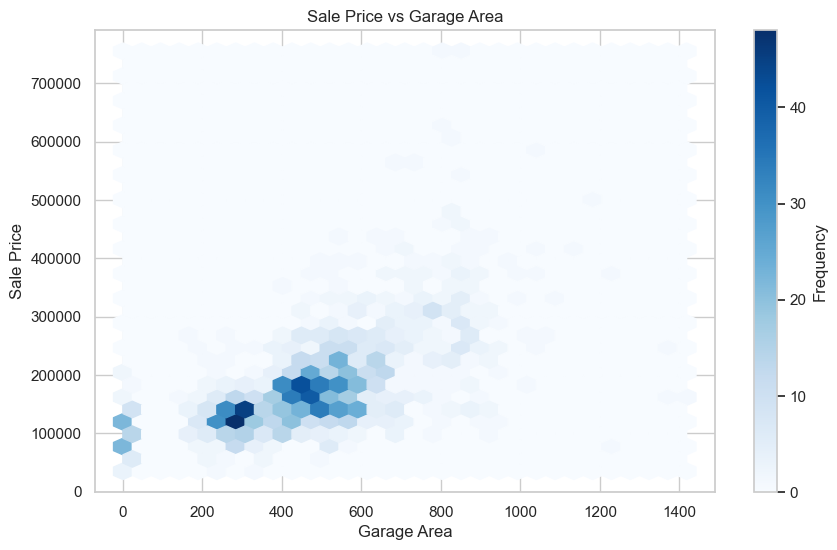

In [12]:
plt.figure(figsize=(10, 6))
plt.hexbin(data['GarageArea'], data['SalePrice'], gridsize=30, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Sale Price vs Garage Area')
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')


Text(0, 0.5, 'Sale Price')

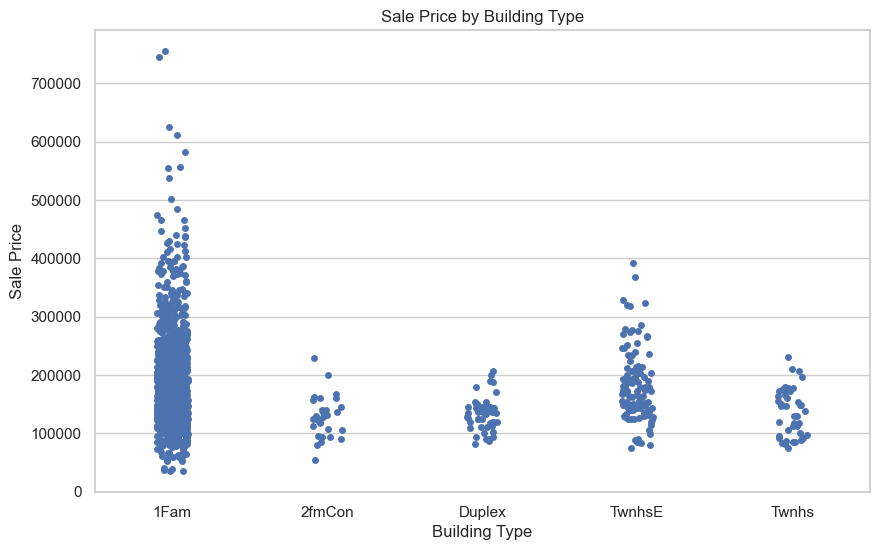

In [14]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='BldgType', y='SalePrice', data=data, jitter=True)
plt.title('Sale Price by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Sale Price')


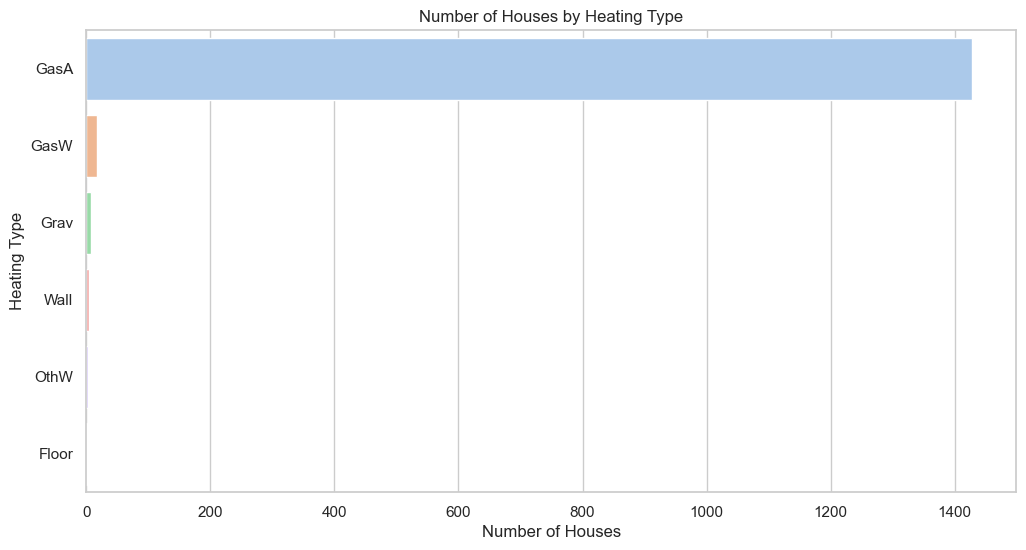

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Heating', data=data, palette='pastel')
plt.title('Number of Houses by Heating Type')
plt.xlabel('Number of Houses')
plt.ylabel('Heating Type')
plt.show()



Text(0.5, 1.02, 'Pair Plot of Selected Features')

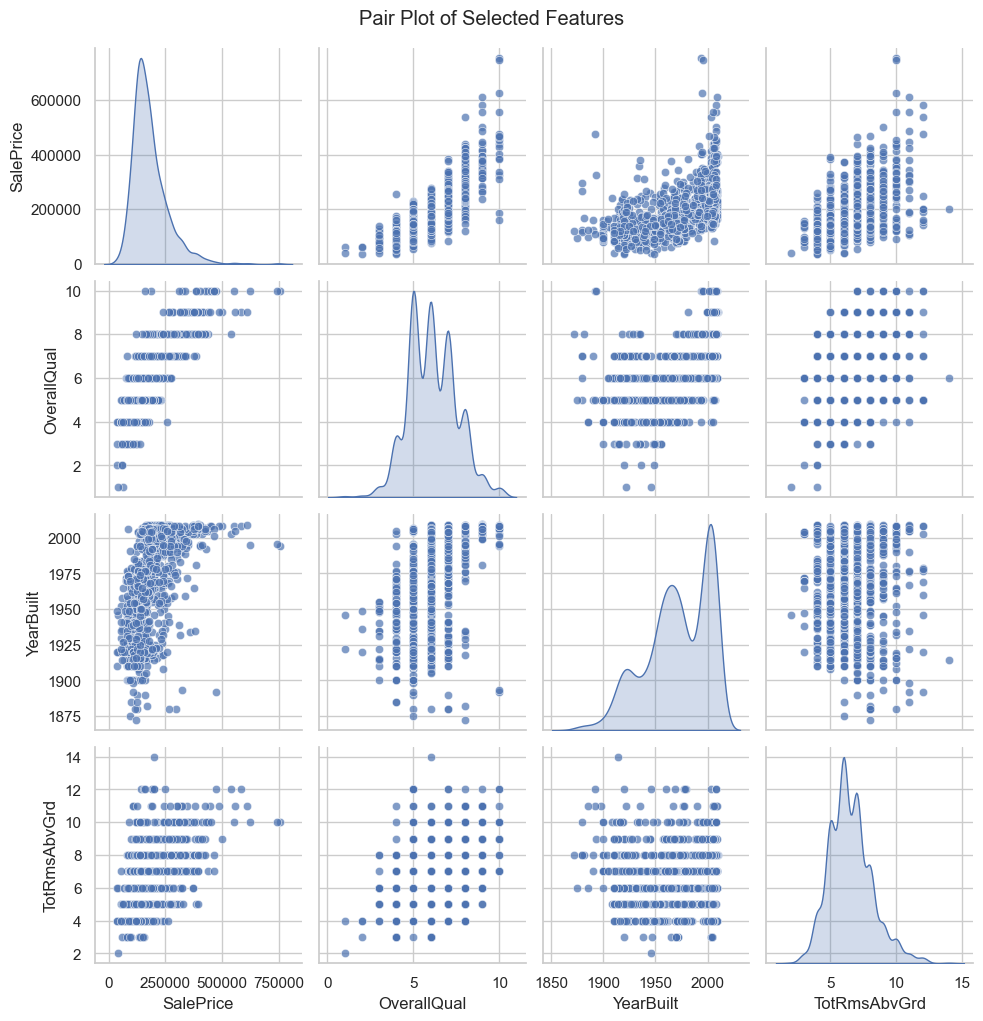

In [19]:
sns.pairplot(data[['SalePrice', 'OverallQual', 'YearBuilt', 'TotRmsAbvGrd']], diag_kind='kde', plot_kws={'alpha':0.7})
plt.suptitle('Pair Plot of Selected Features', y=1.02)



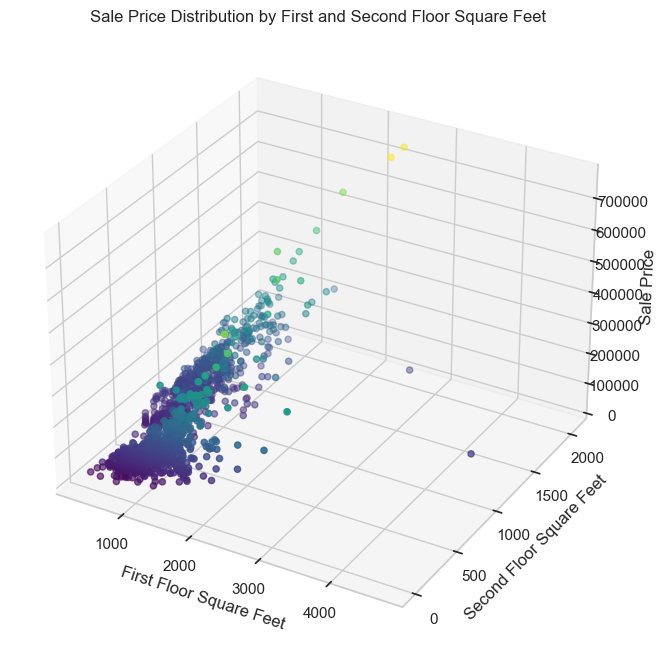

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['1stFlrSF'], data['2ndFlrSF'], data['SalePrice'], c=data['SalePrice'], cmap='viridis')
ax.set_title('Sale Price Distribution by First and Second Floor Square Feet')
ax.set_xlabel('First Floor Square Feet')
ax.set_ylabel('Second Floor Square Feet')
ax.set_zlabel('Sale Price')
plt.show()


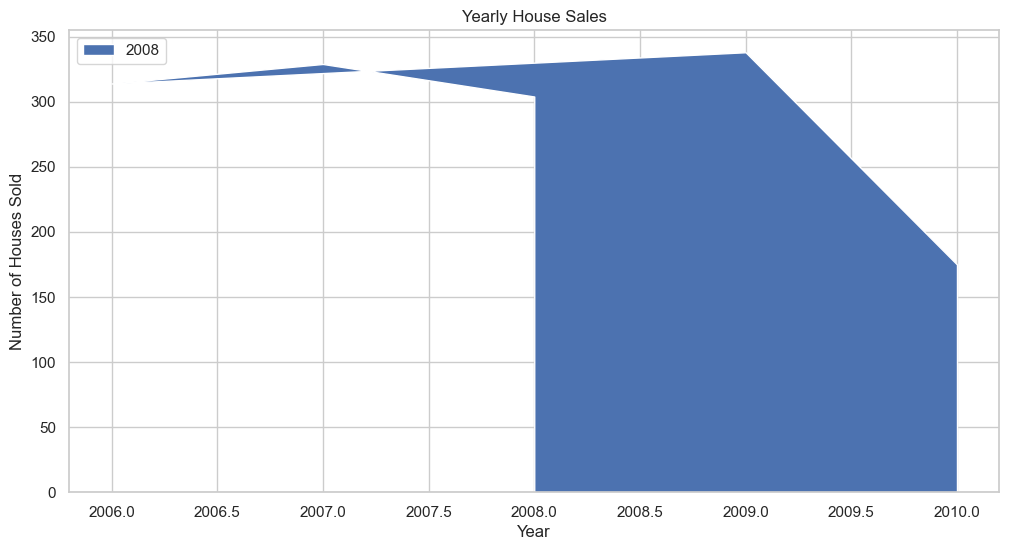

In [23]:

years = data['YrSold'].unique()
yearly_data = {year: data[data['YrSold'] == year]['SalePrice'].count() for year in years}

plt.figure(figsize=(12, 6))
plt.stackplot(yearly_data.keys(), yearly_data.values(), labels=yearly_data.keys())
plt.title('Yearly House Sales')
plt.xlabel('Year')
plt.ylabel('Number of Houses Sold')
plt.legend(loc='upper left')
plt.show()


Text(0, 0.5, 'Number of Houses')

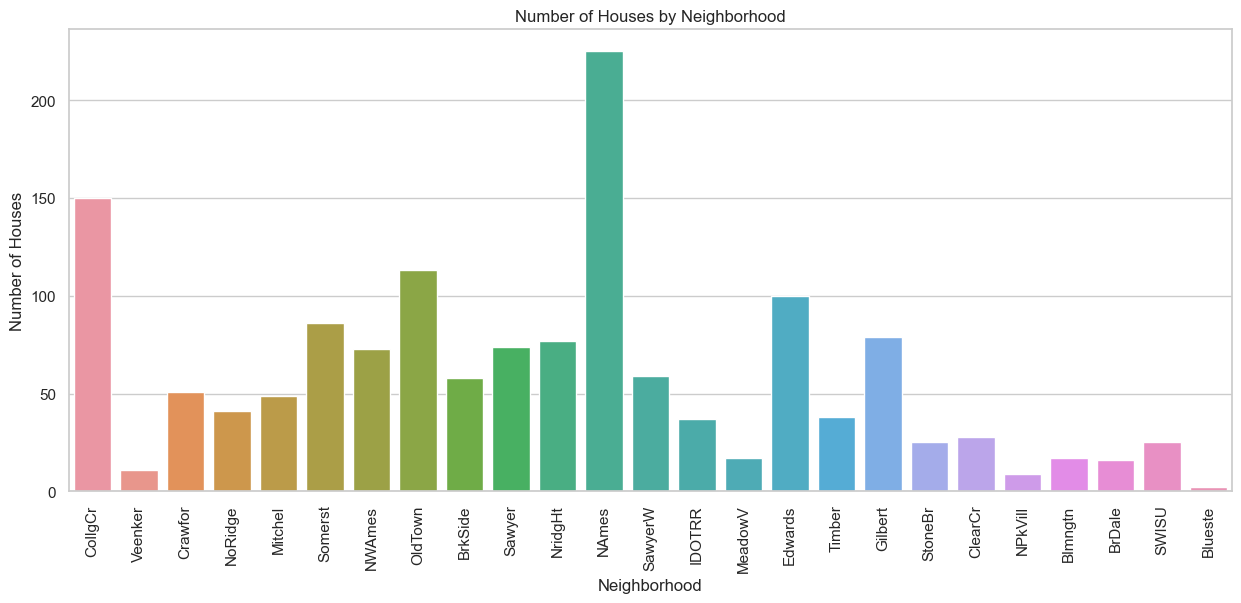

In [32]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Neighborhood', data=data)
plt.xticks(rotation=90)
plt.title('Number of Houses by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Houses')



Text(0, 0.5, 'Number of Houses')

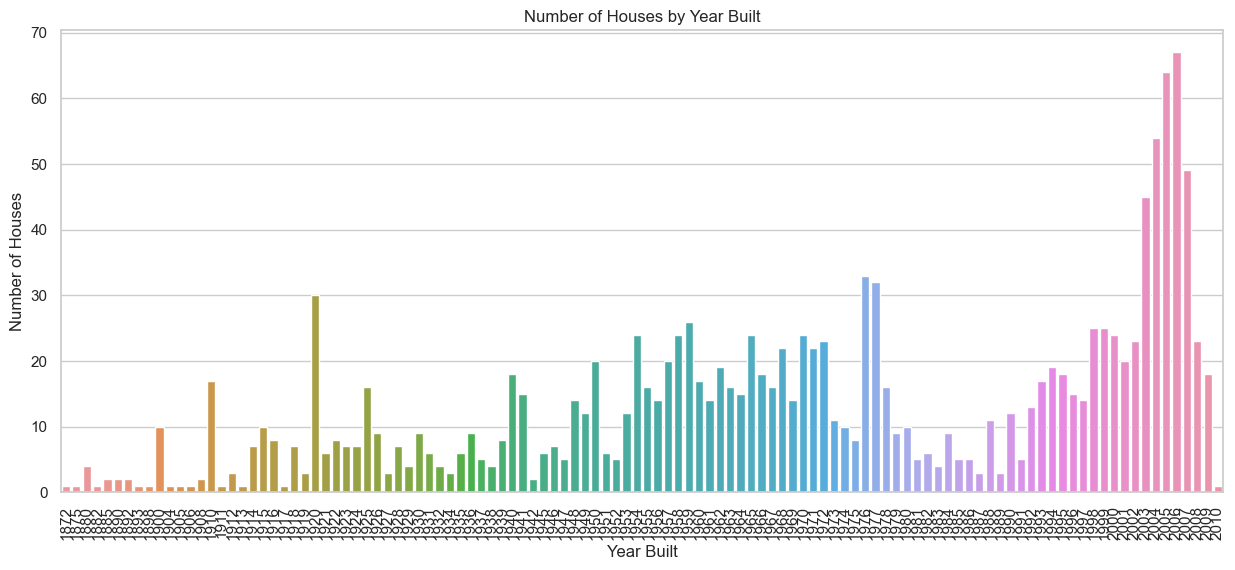

In [29]:
plt.figure(figsize=(15, 6))
sns.countplot(x='YearBuilt', data=data)
plt.xticks(rotation=90)
plt.title('Number of Houses by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Number of Houses')


Text(0, 0.5, 'Frequency')

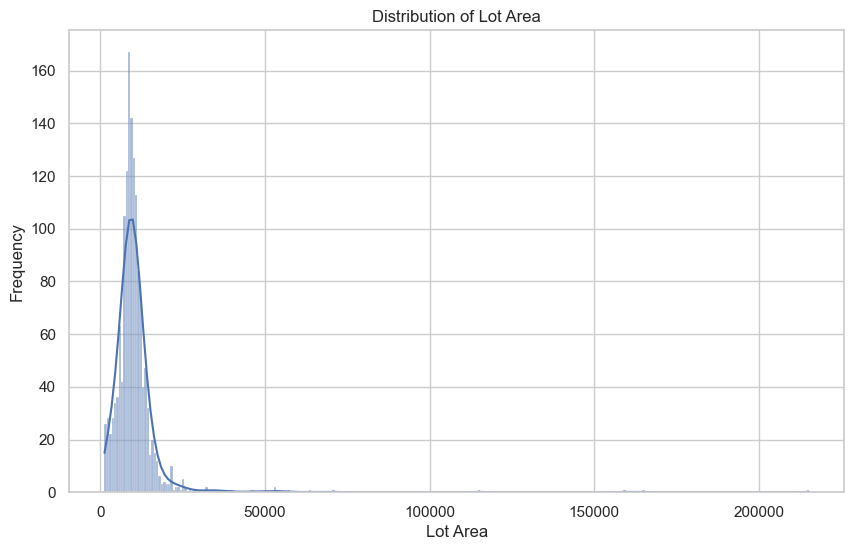

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data['LotArea'], kde=True)
plt.title('Distribution of Lot Area')
plt.xlabel('Lot Area')
plt.ylabel('Frequency')


Text(0, 0.5, 'Number of Houses')

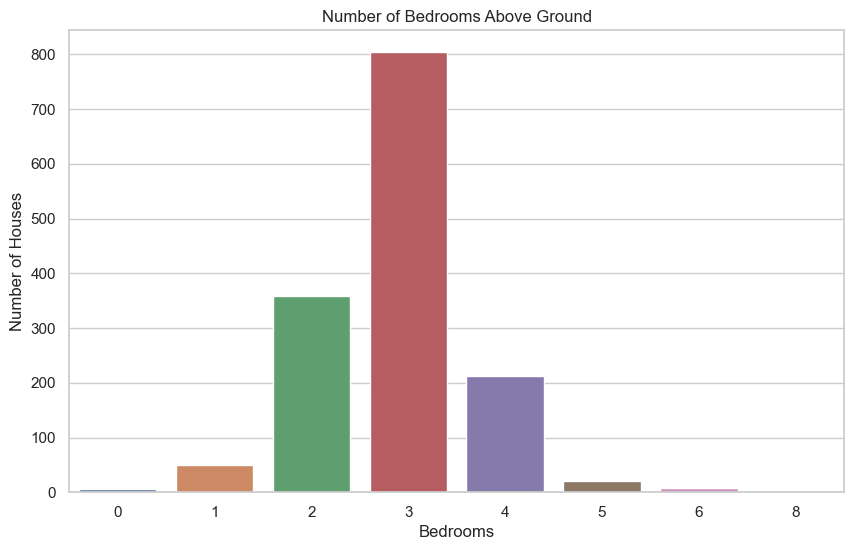

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='BedroomAbvGr', data=data)
plt.title('Number of Bedrooms Above Ground')
plt.xlabel('Bedrooms')
plt.ylabel('Number of Houses')


